In [1]:
import aniensemblestats as aes
import pandas as pd
import os

In [2]:
errdir = '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/'
efiles = [errdir+f for f in os.listdir(errdir)]
tsname = ['DrugBank',
          'Tripeptide',
          'GDB07to09',
          'MDBenchmark',
          'GDB10to13',
          's66x8',
         ]
print(efiles)

['/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/tsdata_9.0.5_3.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/tsdata_9.0.5_2.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/tsdata_8.3.6.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/tsdata_6.2.4.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/tsdata_9.0.4.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/tsdata_6.0.0.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/tsdata_9.0.5.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/tsdata_9.0.5_4.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/tsdata_8.0.6.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/complete/tsdata_9.0.5_6.h5', '/home/jujuman/Research/DataReductionMethods/model6

In [3]:
eed = aes.evaluate_ensemble_data(efiles)

for k in tsname:
    print('Calculating stats for:',k)
    print(eed.get_error_table(k))

Calculating stats for: DrugBank
         EMAEm  EMAEs  ERMSm  ERMSs  FMAEm  FMAEs  FRMSm  FRMSs  dEMAEm  dEMAEs  dERMSm  dERMSs
6.0.0    23.25   4.74  33.16   7.23   6.89   0.52  12.82   1.19    5.45    0.61    7.94    1.02
6.2.4    23.67   4.80  32.87   5.91   6.49   0.61  12.01   1.46    5.27    0.70    7.44    1.04
8.0.6    16.68   2.51  22.28   2.65   5.34   0.39  10.24   0.91    4.17    0.38    6.03    0.60
8.3.6     2.87   0.11   4.87   0.32   3.20   0.00   5.05   0.10    2.29    0.01    3.16    0.02
9.0.4     2.75   0.08   4.43   0.50   3.19   0.01   5.07   0.08    2.24    0.01    3.09    0.05
9.0.5     3.02   0.21   7.06   2.59   3.25   0.07   6.04   1.15    2.38    0.06    4.06    0.92
9.0.5_2   3.10   0.12   7.10   2.89   3.25   0.13   5.85   0.77    2.35    0.12    3.70    0.79
9.0.5_3   2.80   0.06   5.65   0.81   3.20   0.05   5.64   0.28    2.32    0.04    3.42    0.23
9.0.5_4   2.59   0.12   4.54   1.32   3.19   0.03   5.90   0.67    2.28    0.04    3.43    0.43
9.0.5_6 

In [4]:
print(eed.get_net_keys())
print(eed.get_size("9.0.4","DrugBank"))
print(eed.get_size("9.0.4","Tripeptide"))
print(eed.get_size("9.0.4","GDB07to09"))
print(eed.get_size("9.0.4","GDB10to13"))

dict_keys(['9.0.5_6', '8.0.6', '8.3.6', '9.0.4', '6.0.0', '6.2.4', '9.0.5_2', '9.0.5_3', 'ANI-1', '9.0.5_4', '9.0.5'])
(3, 13379)
(3, 1984)
(3, 36000)
(3, 47670)


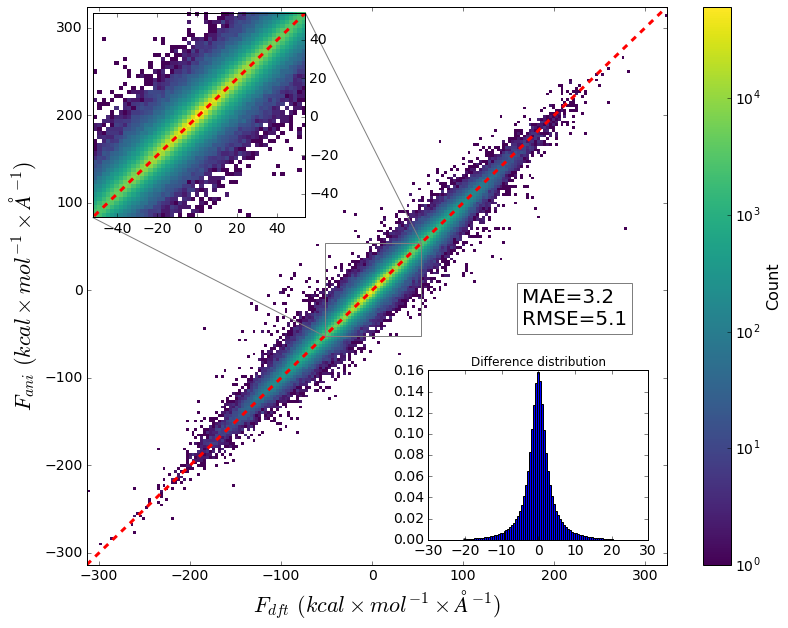

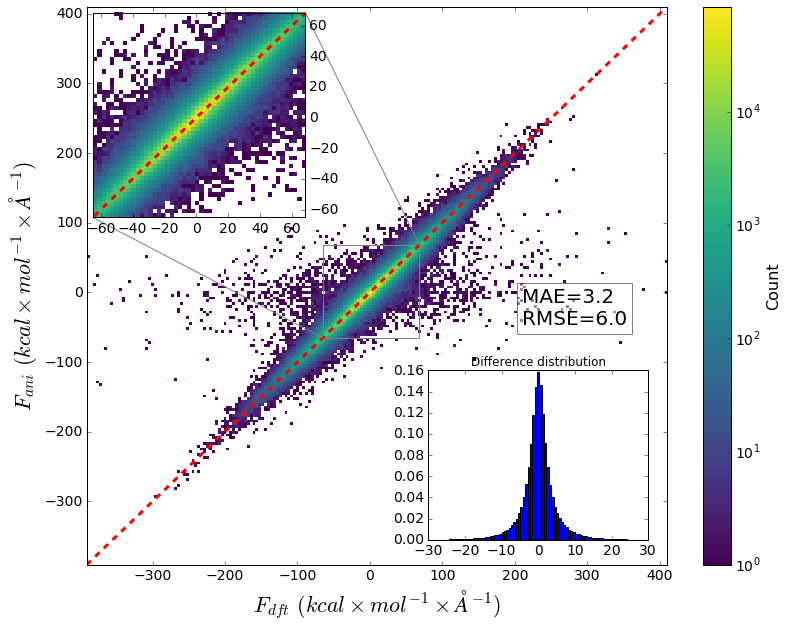

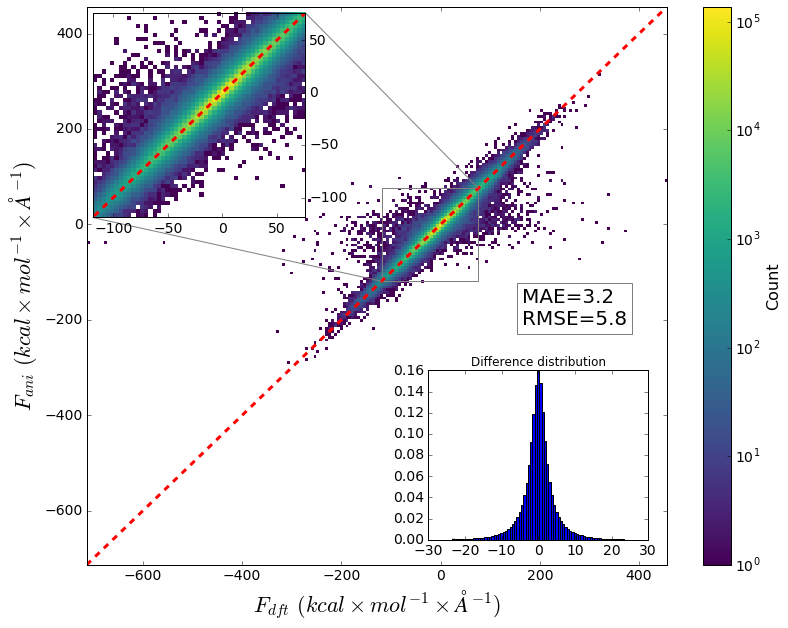

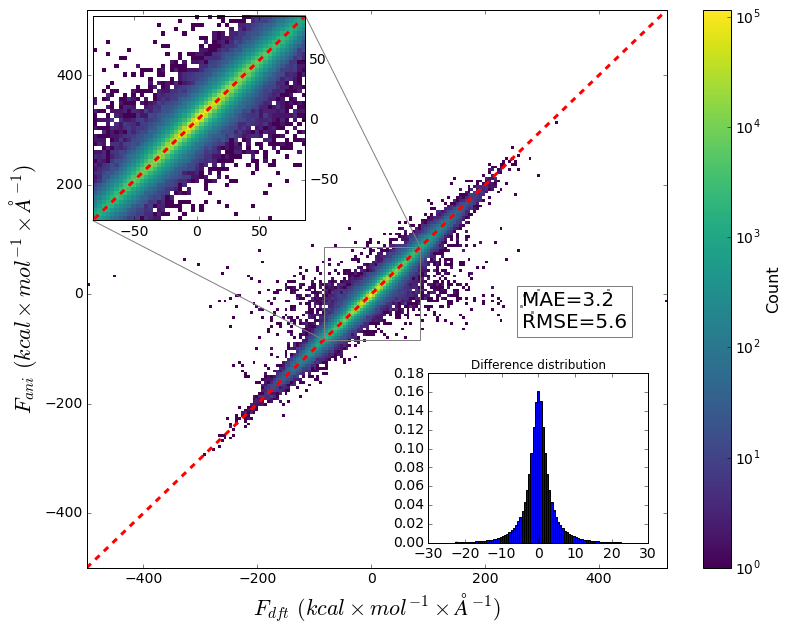

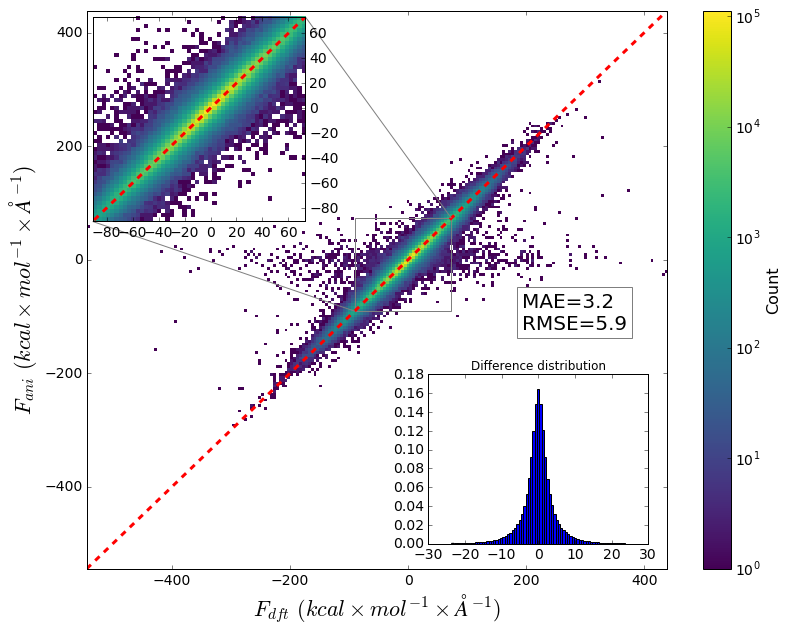

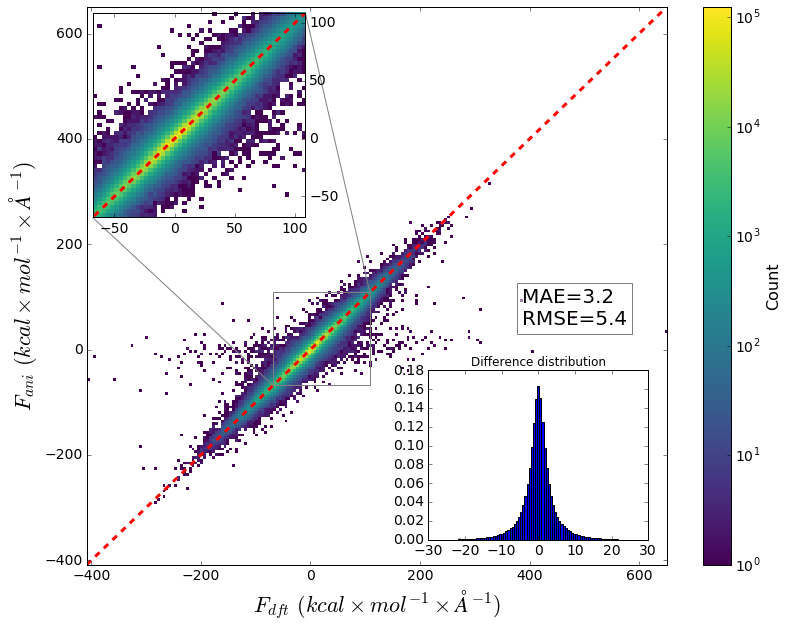

In [6]:
#eed.generate_correlation_plot('ANI-1','DrugBank','dEani','dEdft')
#eed.generate_correlation_plot('6.0.0','DrugBank','dEani','dEdft')
#eed.generate_correlation_plot('8.0.6','DrugBank','Fani','Fdft')
#eed.generate_correlation_plot('9.0.1','Tripeptide','Fani','Fdft')
##eed.generate_correlation_plot('ANI-1','GDB07to09','Fani','Fdft')
##eed.generate_correlation_plot('8.3.6','GDB07to09','Fani','Fdft')
#eed.generate_correlation_plot('9.0.3','DrugBank','Fani','Fdft')
#eed.generate_correlation_plot('8.3.6','MDBenchmark','Fani','Fdft')
eed.generate_correlation_plot('9.0.4','DrugBank','Fani','Fdft')
eed.generate_correlation_plot('9.0.5','DrugBank','Fani','Fdft')
eed.generate_correlation_plot('9.0.5_2','DrugBank','Fani','Fdft')
eed.generate_correlation_plot('9.0.5_3','DrugBank','Fani','Fdft')
eed.generate_correlation_plot('9.0.5_4','DrugBank','Fani','Fdft')
eed.generate_correlation_plot('9.0.5_6','DrugBank','Fani','Fdft')
#eed.generate_violin_distribution('GDB10to13')
#eed.plot_2d_error("6.0.0", "DrugBank", maxstd=100.0)

In [ ]:
#eed.plot_bar_propsbynet([('Total Energy',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft',[0.0,23.0]),
#                         ('Relative Energy',r'RMSE ($kcal \times mol^{-1}$)','dEani', 'dEdft',[0.0,12.0]),
#                         ('Force',r'RMSE ($kcal \times mol^{-1} \times \AA^{-1}$)','Fani', 'Fdft',[0.0,10.0])], 
#                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 's66x8'],
#                         ntwks=['6.0.0','7.0.4','8.0.6','8.3.6','9.0.4','ANI-1'],
#                         fontsize=30, bbox_to_anchor=(0.3, 1.0), figsize=(40.0, 32.0), ncol=2, errortype='RMSE')

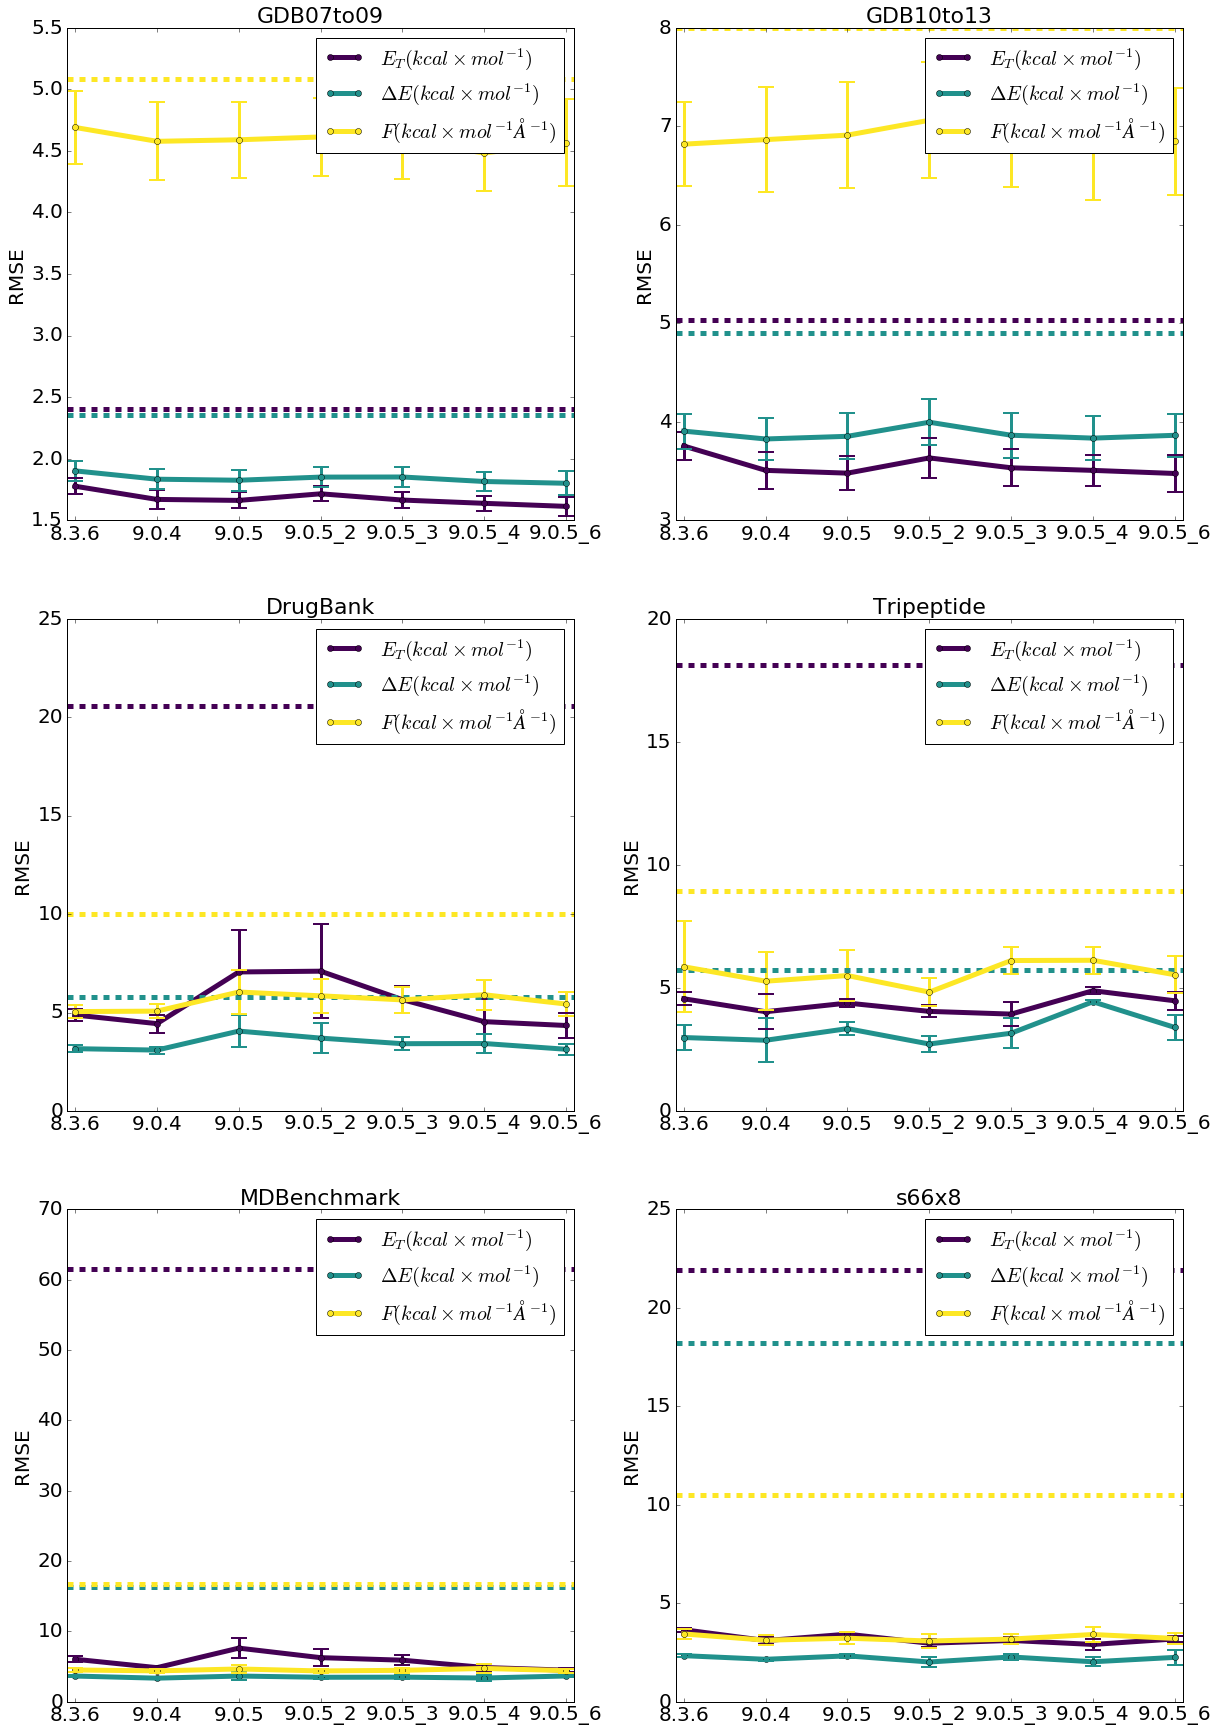

In [12]:
eed.plot_error_by_net([(r'$E_T (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                       (r'$\Delta E (kcal \times mol^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','dEani','dEdft'),
                       (r'$F (kcal \times mol^{-1}\AA^{-1})$',r'RMSE ($kcal \times mol^{-1}$)','Fani','Fdft'),], 
                         ['GDB07to09', 'GDB10to13', 'DrugBank', 'Tripeptide', 'MDBenchmark', 's66x8'],
                         ntwks=['8.3.6', '9.0.4', '9.0.5', '9.0.5_2', '9.0.5_3', '9.0.5_4', '9.0.5_6', 'ANI-1'],
                         fontsize=20, bbox_to_anchor=(1.0, 1.0), figsize=(20.0, 30.0), ncol=1, errortype='RMSE')

In [ ]:
#eed.generate_violin_distribution('GDB10to13')